In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
test_data= pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
test_ids=test_data["PassengerId"]
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
train_data=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


There are null values in each column except PassengerID.

In [6]:
train_data=train_data.drop(["PassengerId","Name","Cabin"],axis=1)
test_data=test_data.drop(["PassengerId","Name","Cabin"],axis=1)

In [7]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [8]:
le=LabelEncoder()
train_data['HomePlanet']=le.fit_transform(train_data['HomePlanet'])
train_data['CryoSleep']=le.fit_transform(train_data['CryoSleep'])
train_data['Destination']=le.fit_transform(train_data['Destination'])
train_data['VIP']=le.fit_transform(train_data['VIP'])
test_data['HomePlanet']=le.fit_transform(test_data['HomePlanet'])
test_data['CryoSleep']=le.fit_transform(test_data['CryoSleep'])
test_data['Destination']=le.fit_transform(test_data['Destination'])
test_data['VIP']=le.fit_transform(test_data['VIP'])

Passengers in CryoSleep are confined so they won't be able to spend on the services available onboard.

In [9]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True


Marking the passengers in Cryosleep = 0

In [10]:
test_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0


In [11]:
train_data['Transported']=le.fit_transform(train_data['Transported'])

In [12]:
train_data.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

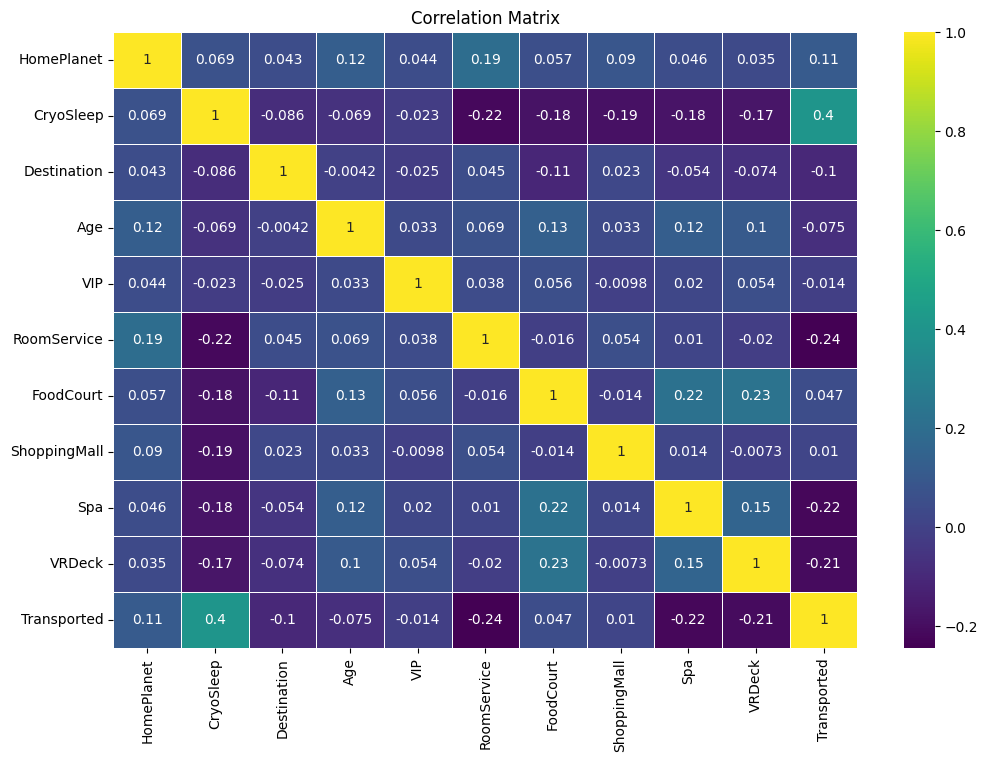

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(),annot=True,cmap='viridis',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [15]:
col_to_fill=['Age','RoomService','FoodCourt','ShoppingMall','Spa' ,'VRDeck']
for col in col_to_fill:
    fill_val=train_data[col].median()
    train_data[col]=train_data[col].fillna(fill_val)
    test_data[col]=test_data[col].fillna(fill_val)

In [16]:
train_data.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [17]:
x=train_data.drop(['Transported'],axis=1)
y=train_data['Transported']

In [18]:
x

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0


In [19]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
print(f'Training data has {len(x_train)} entries')
print(f'Test data has {len(x_val)} entries')

Training data has 6954 entries
Test data has 1739 entries


In [21]:
clf_lr=LogisticRegression(random_state=0,max_iter=1000)
clf_lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [22]:
prediction=clf_lr.predict(x_val)

In [23]:
score=accuracy_score(y_val,prediction)
print(f'Accuracy score on Logistic Regression {(score*100)} %')

Accuracy score on Logistic Regression 77.11328349626221 %


In [24]:
from sklearn.svm import SVC
clf_svm=SVC(kernel='rbf',random_state=0)
clf_svm.fit(x_train,y_train)
svm_pred=clf_svm.predict(x_val)
svm_score=accuracy_score(y_val,svm_pred)
print(f'Accuracy score on SVM {(svm_score*100)} %')

Accuracy score on SVM 77.34330074755607 %


In [25]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(criterion = 'gini')
clf_rf.fit(x_train,y_train)
rf_pred = clf_rf.predict(x_val)
rf_score=accuracy_score(y_val,rf_pred)
print(f"Validation Accuracy RF is : {(rf_score*100)}")

Validation Accuracy RF is : 77.68832662449684


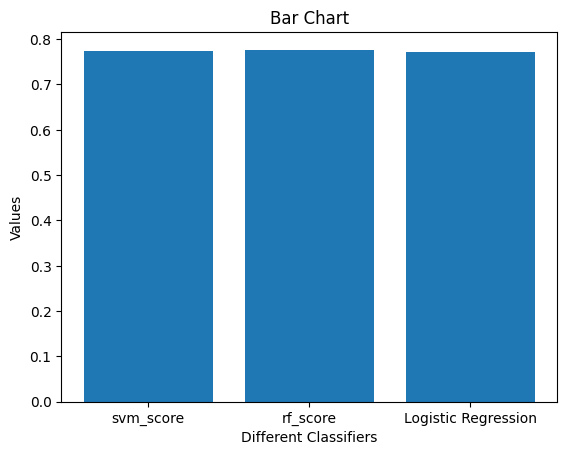

In [27]:
x = ['svm_score','rf_score', 'Logistic Regression']
y = [svm_score,rf_score, score]
plt.bar(x, y)
plt.xlabel('Different Classifiers')
plt.ylabel('Values')
plt.title('Bar Chart')

plt.show()

In [30]:
submission_preds=clf_rf.predict(test_data)

In [31]:
df=pd.DataFrame({ "PassengerId":test_ids.values,
                 "Transported":submission_preds,
               })

In [32]:
mapping = {0: False, 1: True}
df['Transported'] = df['Transported'].replace(mapping)
df['Transported'] = df['Transported'].astype(bool)

/tmp/ipykernel_33/4092193985.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Transported'] = df['Transported'].replace(mapping)


In [33]:
df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
